In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Dataset ,DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn import datasets as dt
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification

%run functions2D-2.ipynb
%run Geometric_Code.ipynb
plt.rcParams["figure.figsize"] = (6, 6)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


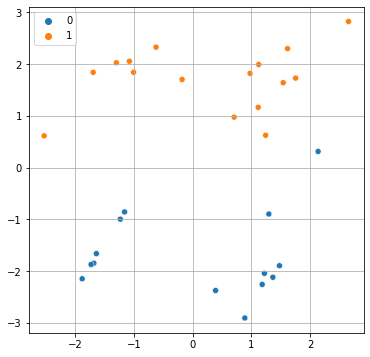

In [2]:
X = [[-0.17752935438092976, 1.7030389719628134], [1.126056970129353, 1.9932323432567967], [-1.6792319482702536, -1.8478171559203442], [-1.6365244915453458, -1.6634513173684076], [1.2992444529654268, -0.8971044389960479], [0.979362885286534, 1.8212549226649308], [1.3680081609724093, -2.120016682639298], [1.7546394639240201, 1.7299765824901736], [1.2238290338390445, -2.043817680961344], [-0.6206260317581475, 2.3279380919453763], [1.4799529917490113, -1.8969737568961675], [-1.0748026618566633, 2.0555139412423458], [1.5437879148362503, 1.6405098428152955], [0.8905204679183966, -2.9070328677785486], [1.2448133982101923, 0.6250181359909927], [0.3924658383725028, -2.3759938407144103], [-1.1570555744275937, -0.8572138264640112], [1.11778736167021, 1.1645043710042338], [-1.6915922164902435, 1.841143841468007], [1.618032945236981, 2.2999513734819743], [-1.22871962105833, -0.9971377910849847], [-1.2969388646342093, 2.0259842689513596], [-1.7273206062706046, -1.8725872914940647], [0.7086959653910497, 0.975143747154876], [1.1859166415252886, -2.2592945144838295], [-1.8788061849747382, -2.148985260668735], [2.6559016030245113, 2.8245505018402577], [-2.5253902434155613, 0.6137679943518664], [-1.0033347633637675, 1.8425344213046713], [2.137622503959107, 0.31152091296452933], [1.0353826873129366, -1.6317369194195515], [1.6837955952908408, 1.9574420284267586], [-1.1654902129883102, -0.9077527257589557], [-0.022552477251252423, 0.5850866592355013], [0.350171102706365, 2.4371824020119255], [1.6731014793343053, 1.6841485942708139], [-1.1888012176823528, 2.0740039039237637], [-0.1702185124864939, 2.50399100299264], [-2.9103392629288525, -0.42547384238719843], [-1.5340760199163346, 0.8197066817833634], [-2.197429301167059, -2.9770545621625493], [0.7863989529791932, 2.487869491852588], [-2.6901220765658715, 0.2812575128867505], [1.1758317738292772, 0.36114014119546867], [0.9129438680200291, -1.9762058819909851], [0.6675427422468848, -3.391489301786785], [-2.07363457636218, 0.3543388995199981], [0.7351947478462243, 1.044239328491338], [-0.5665204647187796, 1.514141219957843], [-2.0492968518970973, -2.694950017179154], [1.8733071419597411, -1.145271269044079], [1.2317651478563854, 1.2226470045807691], [1.7407581659214906, -1.249919770235894], [1.4382995218043662, 1.7122210374346303], [1.2872922001190896, -1.6074295332997106], [2.0509291947663195, -0.24135141981777197], [1.2846519266756098, 0.8365411659733525], [1.8050447803305734, -1.9385212967682524], [1.735776784846907, -1.7514372064360546], [-2.256499628170016, 1.4945055052199474], [0.2597564751531176, 1.8299848274622583], [-1.8350039345401339, 0.902947585695583], [1.9878935611172581, 0.21897884153875657], [2.3566152117680175, -0.6784628277155507], [-1.0047827845345956, 1.6393424796812897], [1.7247195876302315, -0.7398984939014276], [1.8027094734478202, -1.357717645129907], [-1.9660033703993935, -2.4415993272888525], [0.22680980354460312, 0.5584394067517946], [-1.9645753943166906, 1.0938188260182058], [-2.731204095344877, 0.47338336137978976], [1.6341077282264969, -0.8952429680443185], [-1.3311313010248014, -1.2828163034796471], [-2.481884178109689, 0.799805770444879], [-2.3136900100432922, 1.0086210347897027], [2.3096376621662653, -0.5940931018482767], [-1.0404019583369442, 2.2858759751788194], [-1.4606190284266733, 1.482908418782601], [1.4891698254172152, -1.8758188186226028], [-1.20263644199936, 1.6188520502439907], [1.651127440872308, -1.9497417250578923], [1.8497501423016378, -1.4172661800432311], [1.8277179510690127, -1.9946993887717688], [2.1425021066363974, -0.3554104257272128], [1.729334180516287, 2.4467169412692424], [1.8082401891621405, -0.2674886985446565], [-1.4568077345783692, 1.9101867741387109], [-2.3332638082946007, 0.7793212611475355], [1.7287779356629978, -0.16020647378602892], [-0.9652598190750317, 2.178101090573487], [0.8982282986817134, 0.7106253114663394], [-1.668049844608136, 1.1581804085812075], [-0.3406315719583992, 2.792635727927957], [-2.216584287968546, 1.1744885335961117], [0.018257849032921047, -1.622707090638448], [-0.9726040703925342, -0.5544541676444001], [-1.7592185992323883, -1.942029631388453], [-1.2036947724512304, -1.0075707483251515], [2.9442842042546102, 2.0964226618984876], [0.5960513602966754, -3.5638501906606876], [-1.4351607955505412, 1.5904572879698224], [-1.386006124955481, -1.4067133707240385], [1.0693494015822023, -1.822512618220712], [-1.9930312639811931, 0.9060842125582615], [1.2534712980590688, -2.1486369803114616], [-0.9283380238376397, -0.5116802607851945], [1.2947950474718681, 1.9356964873609717], [2.6553124821589034, 1.6324663061442048], [1.0552698933203355, 2.7713673771810843], [2.5204961357915017, -0.08696915414482476], [1.4153401835797839, 2.8496014793598503], [-1.4071525095692503, -1.2282706693994496], [-2.121863742111737, 0.6515080889240943], [2.0563380483536298, -0.5417388403002659], [1.2330305789116447, 1.9262793097801105], [1.567906217299449, 0.7322998664576917], [-1.5626829080148295, -1.7457788781001446], [-1.5232534663255772, 1.5936302696199194], [2.222631047525727, 1.1235211995037462], [0.6292798520650601, 2.116418061938343], [-1.671317555907405, -1.9491808917479092], [-1.565393879950032, -1.354540891874073], [-1.574577255112061, -1.548255292142775], [-1.4443931851514966, -1.1200509938538796], [1.503506459470712, -2.9568766948917933], [-0.3182249605962739, 1.2175305340075226], [-2.07576848471282, -2.4588438497222045], [-2.4950961344878424, 0.2592847087213528], [-1.278601380285058, 1.5888547924003984], [-1.0301568679773345, 1.8466613533143548], [-1.155746512574651, -0.8722032080400388], [-1.7871578907881067, 0.9140424110397548], [1.6753726247583232, 1.6674338278377845], [2.10135336373662, 3.1735425675233033], [-1.521349401452422, -1.6861348608025684], [-1.1504262423056626, 1.682021912870227], [3.4432121699299847, 3.1080942353442236], [0.9078125894421287, -1.5780921762174764], [0.9001130436696455, -2.5226108607313096], [-1.4940961783053759, -1.7181935686558625], [-1.7077747144701971, -1.9753553159898642], [-1.9213308250082124, -2.188559396119143], [-1.2074684009971257, -0.860358772376332], [-1.7612781496621004, -2.0854445238161947], [1.221649578356434, -1.1659995385988011], [2.288699642421492, 1.2125552148267413], [-1.937145312752228, -2.318691394326928], [2.7084635647783966, 1.473783287554735], [-1.751872505545491, -2.0114249206402883], [1.6593738433763932, -0.9846884684991872], [-0.6418334209701244, 3.1060544683888427], [-1.2267988358992357, 1.9531088734446764], [-1.7866265044303113, -1.8404383961773088], [0.8668124665725198, -2.814714178556771], [1.4093582688420405, 1.2080415407602556], [-0.7133822072221454, 2.310372899972685], [-1.1272055155355754, -0.5633454002821117], [-0.8667441300487487, -0.2782824907992276], [-1.360382477309827, 1.5183489021288146], [-1.505171148779361, -1.5325416763512982], [0.7335828221038166, -2.0154601304061472], [-1.4801113246181616, 2.0133206358382756], [0.8613675613692845, 1.9084634651103494], [2.311780215538844, 1.7909947660110284], [1.986917318916813, 2.0737064035397985], [-0.390364538349939, 2.195453258740311], [-2.1898830789845247, 0.970482294460946], [-1.5720220855202238, 1.0400282790002457], [-1.76469393353912, 1.5077246526958752], [0.053767314957396284, 1.0299365675819452], [1.884032245845542, 0.9485160952666429], [-1.2239334565773803, -0.9948421933496705], [-0.7822531907124165, -0.05608305818453907], [0.8681275745703436, 2.7218289021493156], [-1.2930311516019228, -1.1479531116431911], [1.1274945581239697, 2.1482029846121082], [0.6189838512368685, 1.2752599107895384], [-1.8134198094136063, -2.0433920477333127], [1.6757273889625344, 1.5805696582336157], [-0.5779519696322499, 2.937096477284105], [2.6240943430067007, 1.880826079560077], [-1.0899956332318417, -0.6762019851390421], [-1.2602380540696474, -0.9869347353669099], [-0.6826413729057226, -0.11067601482905332], [1.4016692821426238, -1.2422551856622077], [-1.3466306258381628, -1.1514034164147773], [-1.4195139833551407, 2.390188983123347], [0.37712973129635796, 0.8321643416379113], [-1.215696753391739, 2.230266522037416], [2.292375495516219, 0.18726949993891195], [0.7654623879116836, 0.33786212449398945], [-2.100096832892614, -2.5013926908019712], [1.9928469848455053, 1.6673076849528163], [-1.8825420219937619, -2.130830531176116], [-1.2390223443081916, -0.9154963461318716], [3.7061624667058335, 1.123908922205532], [-1.1739640892378773, -0.7105300488544108], [-2.495585248881722, -3.4515172454213534], [1.7241322242221504, -1.717006455885978], [1.5043452238799153, -1.3057751956703798], [-1.1187869759873408, 1.4000676813310287], [1.4700652099951161, -2.03333639991187], [1.778877085373354, -0.8124712844189974], [-2.0688102686263243, 0.9459197438542829], [0.7905805275908014, -1.4449904801491256], [-1.8680459697457974, 1.5724623994566787], [0.9810058368037904, 1.0929329962050465], [1.6783878389934939, -0.15537658646585162], [-1.090333410841406, 1.8695070840220978], [-1.338847977746091, 1.257596967895367], [-1.682385087250447, 0.7978425695630751], [-1.2018199108721226, -0.9634784655359182], [1.7996319980246822, 1.7573258039006128], [-1.1677739543232237, -0.7621200714074874], [3.274027798341195, 3.319639292561116], [-1.77048129210399, -2.062963558263264], [0.3295481843292405, 2.3850663519126374], [-0.5512308725870234, 0.33749451906043104], [-1.8713753099938288, -2.2384415755285128], [-2.8296479820986766, 0.5363370953403834], [-0.8500945922331735, -0.29233789244638864], [-1.681043296599237, -1.8235832547523043], [-0.9389169224056594, -0.4597027351271765], [-1.5122143903674263, -1.4860229840251855], [1.5809476328643532, -2.2772201491104216], [0.9634919226927632, -0.694165301889923], [2.0752181403956547, -1.2642556237632183], [0.8148842572200728, -1.5826736944636826], [1.3864432995440998, 0.33753925866183065], [0.909725185357819, 3.5013405958759796], [1.6292168397568683, 3.5734900772265457], [0.20990069876152817, 0.8701523432704433], [2.3230829289610297, 1.2019535656751619], [-1.821921283363214, 1.0123516640629906], [2.4785800073789117, 0.4856897511957552], [2.0708059779256187, -0.4793526442812315], [-1.1771568214253414, -1.10836096761834], [-2.2781781126296927, -2.811023654251251], [-2.0834565824082176, 0.4971017075026516], [-1.354148445143193, -1.1724994436237788], [1.6950534493479932, -1.9776230299690312], [1.520049455818542, -2.503354221543966], [0.6654829369615558, 2.976122400055522], [-0.9431300498405243, -0.42134275539051935], [1.4019391448596268, -1.7761230441749094], [1.9051530977504738, -1.370523719705245], [-1.3028759975399726, 2.0017130628916693], [0.8571297281885935, 2.6741732461513132], [-1.1328352940129047, -0.8014001816639409], [-2.782915881844599, 0.2895175009686679], [-1.590383570287045, -1.3855676041114513], [1.9682635012229739, -0.43447642858405455], [-1.2161674123916937, -0.9402917205565867], [-1.9138961936013628, 0.6931047246572434], [-1.3107249827635377, -1.2333511580063001], [-1.406768286581486, 2.0308022145130296], [-0.9884560002046248, -0.4765785394657498], [-1.9219164312875545, 1.0722022494392545], [0.6104031068301643, -3.3340447126521173], [1.2644529480821058, 0.949310271012608], [-0.5748731902837326, 2.301894971660705], [0.026024751566637416, 3.2902621988821785], [-1.9810985028476813, 1.1285028845070184], [-1.1016682349290101, -0.6188346150576743], [1.1711324686185702, -1.1765229520204612], [-1.630690570642115, -1.8765225436234154], [-1.9877902559522815, -2.269675300890584], [1.254582477286064, -1.3686337216345594], [-0.6995920337139744, 2.593622146455874], [2.227535472510128, -0.7796247773876478], [-0.9400371768395775, -0.4877584231749794], [1.8754982396079727, -1.1944402145426403], [0.7785821462746482, -1.40644386289332], [-1.844499613680682, -2.159205566286014], [-1.7641246667143018, 1.526944326448207], [0.6677920259092988, 1.0112595801023148], [-0.754325973048748, 2.6190431513040897], [1.1857204883478154, -1.8228329568007289], [-1.845082029000781, 1.2613204125744066], [0.03851850857075578, 1.5902634390643582], [1.1596708299085285, -1.5484280764173735], [-1.6819734744074635, -1.8130389671895597], [1.3549393724677519, -0.09503244663515908], [1.0929912356098672, -1.9738789781414021], [-0.5477439997079063, 2.705888701911506], [-1.5402027586623928, 1.6037346945427267], [-1.3775050908771704, -1.3140471579778865], [-1.6126008879045093, -1.8430770842875894], [-2.1712170802421955, 0.6234713221198412], [-0.8054347666445854, 2.8587890010788923], [2.327669346456209, 1.1717270467004244], [-1.700579899382435, 0.8990056534855653], [0.6755937833042577, 2.199019617675019], [0.428505597433926, 0.6027621074783015], [1.322348589425373, -2.1349232391420156], [-1.9234829264848556, 1.347980065001382], [0.29759942301696274, -2.733278028508349], [2.414738837637363, 2.0375880573678327], [-1.4707280935698592, 1.0109883010372136], [-1.4086911068242107, -1.2768657346120265], [-2.518390447232296, 0.2879118854770333], [1.5484699388920844, -2.2618702646606494], [-1.5415890641761156, -1.6877814930871586], [0.3940982140926812, -3.1633991844572744], [1.5238628235771527, 0.2596186540367842], [-1.4901364448381471, -1.5937607461456391], [2.124830140803939, -1.9258448217345077], [-1.0725474424838135, -0.5451189201130864], [2.1797490250024336, 1.244272504746846], [-2.5135919297392286, 1.0355380740962616], [-0.7504509172357187, -0.2607423946191527], [-1.1921471264979122, 2.3421815782410498], [-1.197071248354635, -0.9444641818580483], [-0.8604479708917807, 1.9147046515354083], [-1.6175309060838738, -1.5968270852801385], [0.27567518246367695, -3.8756397509931695], [1.003145818947687, -1.699794955320281], [-1.7333413126873658, -1.9174624173405344], [0.28951676542685445, -1.9049163617919445], [2.0931773079800537, -1.2207323389407156], [-0.5911753160100006, 0.11109108279115443], [-1.508870018476383, -1.7139060721572617], [1.2690776246056859, 2.643941898249582], [-1.324751554335485, -1.1351473111678199], [1.1544670319173849, -1.6915023162710214], [-1.0846711085112095, 1.5710882503146322], [1.7151049486695629, -0.43619956648011593], [0.564235384030084, 1.7833669087306192], [-2.227686863965817, -2.7709721702469885], [-1.4267070220535105, -1.4345784054057482], [2.173354230571408, 1.3192955676276594], [-2.373511637671715, 0.9971635440765182], [2.853826333144026, 2.8215256555815786], [-1.445561986340319, -1.3051944571364347], [-1.284047159682183, 1.936714240704256], [-2.382799013973867, -3.2063148971740683], [-1.606706339090257, -1.8382976692917894], [1.4851621461088014, 2.3261230035496205], [2.9469489389496664, -1.1056376643165662], [2.0329267223906307, 1.1056080227877583], [0.7329860389417518, 1.880097588492677], [2.0777180115263634, -0.2703117004337965], [-1.3876926883932927, -1.2778819377506963], [-0.8128689087262271, 1.8948825628236108], [0.5163925641640426, 1.9290293035944903], [1.847283500146227, -1.9146071799829105], [1.3569892247958883, -2.69186210553697], [1.962096332358655, -0.4360555550371039], [0.024056986193034646, 0.4436127713159286], [1.5274811720248012, 2.547560435039449], [-1.3999801971675507, -1.391400221422061], [1.3846759661215597, -2.5578987750572333], [2.4543922043597366, -0.7993146637102972], [2.2157599854794956, 2.141682872300669], [-0.9386320944523091, 1.838592895638237], [-0.9387386807479402, 1.36113828177154], [-1.2601347203290971, 1.7411067476447701], [-1.0449748667078516, -0.6804092485590775], [0.991344154080152, 0.033464929165292645], [-0.8873391378452795, 1.2203802325025603], [-1.4889592962526403, 1.798670741539695], [1.8482890332939772, -1.687759554695535], [-1.9965741646948922, -2.3306449188044933], [-1.8159552615731416, 1.1512418915376634], [1.9135207158899887, -2.12127067886299], [1.9513666181436855, -0.9499332680057594], [0.599931300652046, -1.7094672110690041], [0.9091754289327943, 1.223536172480821], [-1.489989975236901, -1.735123240902169], [-0.6269365151730262, 0.012322297283597017], [1.5821348196206086, 1.7726690853145017], [0.833435384611585, -2.462180599184236], [1.389649340026954, 2.378446105755046], [1.1658886210933237, -0.6880685860156772], [0.43980899068158696, 0.9781718285838452], [-1.552974603878523, -1.6790043804309431], [-1.6053266296265727, 1.3072314827087907], [-2.027619343812024, -2.615136563854658], [-2.5338786171081575, 0.8021487525616191], [-1.6408580966339334, 0.870186232655196], [-1.535544445909439, -1.3006954306759133], [-1.8242116587417678, -2.2083891499377097], [1.5777584415086439, 0.19376388333636352], [1.242004592492568, -2.0881376101203455], [0.891946765607372, -2.5307702871733113], [1.3082737815072334, 1.9316263056138296], [-3.081298015527416, 0.17069486353837293], [1.3870099314670705, 0.4014288347513082], [1.490533586490415, 1.071828682134142], [-0.9712408254806404, -0.5035074908223865], [-1.3666843894045986, 1.4881312147190309], [1.4453922809232032, -2.851280205081493], [1.6467464612934035, 0.9097551214767242], [0.9978835431538188, 0.8095945960059386], [-1.0278353282098553, 2.0599380360353496], [-1.7130299306722565, 1.194336977042925], [-0.8805765102923581, -0.2978440506805806], [1.392672025679232, 2.1392727883586606], [-1.4293369427635125, 1.5964027035637676], [1.143454308544137, -0.3132975814559187], [1.6772722631278387, -0.12418733122526615], [0.830721459389864, -1.5073893418808415], [-0.7294360978256479, 2.2786686627813664], [-1.9808177694941584, 1.0453811607213597], [1.1513083311082766, -2.0813603934513747], [1.879691526734028, -1.0126917436708494], [-1.1379833138612825, -0.9617022326033653], [1.9437266876286823, -1.7624535909404555], [-1.398450607733194, 1.642251273934352], [-1.4352377240382732, 1.2332742715891993], [2.164590668135563, -1.3584534338343077], [-1.872930698014089, -2.3523177153217882], [1.4468133813793005, -1.2224622993767924], [1.765413626951028, -2.0165758903257984], [-0.9567269641902507, 2.0068936650501605], [-0.8678136755964548, -0.31206807731026553], [0.8856259788066129, 1.8973477312995506], [-1.9503682302474763, 0.9629562937082994], [1.3592359808676528, 0.7590116010809667], [-1.2818894459081331, 1.853752320366188], [1.8639228262353125, 1.5330762390075372], [-2.2399727378295378, 1.1574840787567917], [-1.0837480123588406, -0.6844539840772466], [-1.3881844465090343, -1.3262715781755583], [-1.6730007802059113, -1.93479384316495], [-1.6949641258243369, -1.930627106593622], [-0.35334101509689364, 2.7868033956214706], [0.9229718363080388, -2.871129881967079], [1.7004193006459474, 0.9344501484798236], [2.4253562908311803, 1.8041786363129606], [-0.7816003061947545, -0.2858245732527911], [-0.7695562035266343, 2.805217234509416], [0.844126239022684, -1.9394497248934288], [-1.018271498202355, -0.4884720798179589], [-1.6571546935238979, -1.7190116749501743], [2.1199197368219047, 0.6213377954374], [1.8028290964921503, 2.351730519200017], [1.6725542829837388, -2.4827311721889904], [-1.1813682859409784, -0.843006558641657], [1.2627402845929088, -2.6352326523533], [1.1198475058660702, -2.005212714261013], [2.242354247224087, 3.708011542282155], [1.1426738897782442, -2.3663881220820335], [1.1441967863561082, -1.285419750572414], [0.005700592059678655, 2.98074224245342], [1.5261988277221519, -2.906508462908884], [-2.040462669037754, 1.0954016233084674], [-2.3089146836521843, -3.0205041571236153], [1.5602326323291662, 1.4754211539833642], [-0.8733814539256245, 1.7509586696368755], [-1.9524587963759212, 1.2118711387730023], [-1.2469631287023826, -1.2177162201418394], [-1.1765905813097883, 1.5771627349342041], [1.1599488973055323, -0.949618172572687], [-1.8381668854936455, -2.13290432537802], [-1.5662596289130084, -1.5220755578299967], [0.923751062284495, 1.8630092356970882], [-1.5796218099140769, -1.7016228076953137], [1.658174144770964, 2.0409281136888673], [-1.2905058122012614, 1.5116595903298087], [1.2179280774360177, -0.9532614148324635], [-1.4873424169472225, 2.64850024355822], [-1.0086768262815538, 2.3466402733452627], [1.6628290502292558, -0.8242698595129155], [-0.9897750620297185, -0.580267272922829], [-1.0004002740018092, -0.4867782157154257], [1.4346362046162426, -1.5286731930614401], [1.1863381792873342, -3.045743728971369], [2.937166631478724, 1.4592619300081018], [1.9163842144309373, -0.11574679559647527], [1.5414000323995514, -1.2483225641522175], [1.442239675888601, -1.1109545499176692], [2.1333023136377336, 0.9019393738240932], [-0.599064296056842, 2.203184637202754], [-1.5661093607505054, 1.2121139575362827], [-0.9853654676524234, 1.637715842379782], [-0.33626463023692965, 1.0075689412799114], [-2.72871626996851, 0.4217040871128026], [-1.8847378730896756, -2.3657322496272046], [-0.4985671900024835, 2.6872922262843577], [0.706846404926752, -1.3599514695883335], [2.0423606032834702, 0.5003009671803785], [1.8126811717797826, -0.837571538382], [1.6919527108924308, -1.8956219767450944], [-1.5296624829550833, -1.602635011288604], [-1.6556370188183387, -1.6709121887963985], [-2.1842114011811775, 0.33736763339898057], [1.1140956390556573, -0.4340282921976548], [1.7427479477707737, -1.6107136605672783], [-1.5191860086971443, 0.9789127336200323], [-1.7412199293061987, -1.720136662981485], [-1.493074215589872, 1.713330760639501], [0.31789556453470236, -0.12259628798652522], [3.299436787821645, 1.8603968161631053], [1.1567870184816185, 2.5509889204972493], [1.2021104527718003, -1.9422788923926821], [-1.1076751544115477, 1.984925284982209], [-1.5983996911900245, -1.8282528607824928], [-1.546444848632335, 1.5706166568046733], [2.4383964833987233, 1.1688498430670506]]
y = [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1]

X = X[0:30]
y = y[0:30]
X = np.array(X)
labels = np.array(y)

sns.scatterplot(X[:,0], X[:,1], hue = y)
plt.grid()
x0,y0 = seperatePoints1(X)

In [3]:
a = 1
b = 2 #np.sqrt(3)
c = 1
eps = 5

W3 = np.array([b, a, -a*b])

alpha = 2*np.arctan(a/b)*180/np.pi + 90
print(alpha)

t = a**2 + b**2
t = 2*np.array((a*a*b/t, a*b*b/t))

W2_ = congr(-alpha, t)
W2_ = congr(eps, np.array([0.,0.])).dot(W2_)
W2_ = np.array([[1/c,0,0],[0,1,0],[0,0,1]]).dot(W2_)

W2 = aff_inv(W2_)

trg = np.array([[0,-1, 0], [a,0,1], [0,0,1], [0,b,1], [-1,0,0]])
trg = trg.dot(W2_.T)

#line_int_1(np.cross(trg[1], trg[3])

trg[1] = line_int_1(np.cross(trg[1], trg[2]))

trg[0] = trg[1] + np.array([-1, 0, 0])
trg[4] = trg[3] + (trg[2]-trg[1])
#trg = trg[1:4]

p_int = point_of_intersection((line_from_pair_of_points((trg[0], trg[1])) , line_from_pair_of_points((trg[3], trg[4]))))
trg[4] = p_int

image = np.array(trg[[1, 3, 4]])
pln = np.array([[-2,-1,1],[-0.5, 0.75,1], [0.5, -0.75, 1], [3,0.75,1]])
p_int = point_of_intersection((line_from_pair_of_points((pln[0], pln[1])) , line_from_pair_of_points((pln[2], pln[3]))))
source = np.array([pln[2], pln[1], p_int])

W1 = affine_map(source, image)
W1_ = aff_inv(W1)


print(W1)
print(W2)
print(W3)

U = (W1, W2, W3)

143.13010235415598
[[-1.02408269  0.6455378   0.9961947 ]
 [ 0.25714314 -0.42857189  0.62431197]
 [ 0.          0.          1.        ]]
[[-0.74466231 -0.66744141  1.6       ]
 [ 0.66744141 -0.74466231  0.8       ]
 [ 0.          0.          1.        ]]
[ 2  1 -2]


In [4]:
weights1 = np.array(([ -1.02408269 , 0.6455378],
        [0.25714314, -0.42857189]))

weights2 = np.array(([-0.74466231, -0.66744141],
        [0.66744141, -0.74466231]))

weights3 = np.array(([2 , 1]))


bias1 = np.array(([0.9961947,  0.62431197]))

bias2 = np.array(([1.6,0.8]))

bias3 = np.array(([-2]))

In [5]:
W1 = matrix_from_weights(weights1, bias1)
W2 = matrix_from_weights(weights2, bias2)
W1_ = np.linalg.inv(W1)
W2_ = np.linalg.inv(W2)
W21 = W2.dot(W1)
W211 = np.matmul(W2,W1)

W3 = np.array(([2,1,-2]))
W31 = np.matmul(W3,(np.matmul(W2, W1)))
startl1 = (W1_[[0,1],2]) #origin

print(W31)

[ 0.3069356   0.36067791 -0.11704061]


# Layer-1

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

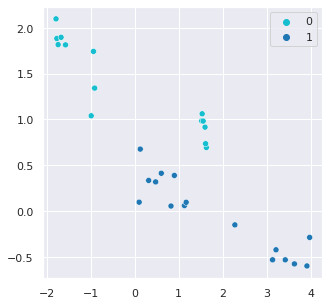

In [6]:
#transform the original data
palette = {0:"tab:cyan",
               1:"tab:blue", 
               }
t1 = applyWeights_on_original(W1,X)

#get points
x1,y1 = seperatePoints(t1)


#Apply ReLU
x1r = applyRelu(x1)
y1r = applyRelu(y1)

palette2 = {0:"tab:orange",
           1:"tab:gray", 
           }
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x1,y1, hue = y, palette = palette)


In [7]:
#view ReLU points

# sns.set(rc = {'figure.figsize':(5,5)})
# sns.scatterplot(x1r,y1r, hue = data['class'], palette = palette)

In [8]:
#coordinates in original space
t1f = makeList1(x1r,y1r)
t1reversed = applyWeightsInverse(W1, t1f)
x1o,y1o = seperatePoints(t1reversed)

t1r_set = makeList(x1o,y1o)
original_set = makeList(x0,y0)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


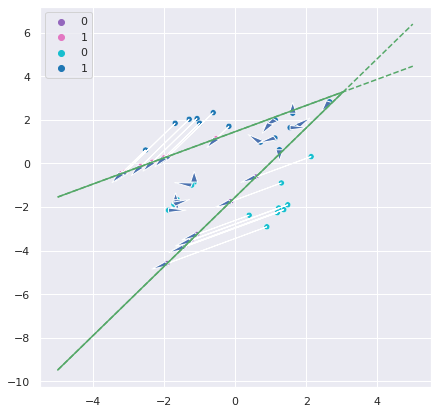

In [9]:
#first 2 hyperplanes
s = 5
ss = np.linspace(-s,5, 2000)
x11,y11 =Generate_Line([bias1[0],weights1[0][0],weights1[0][1]],ss)
x12,y12 = Generate_Line([bias1[1],weights1[1][0],weights1[1][1]],ss)

line1 = makeList1(x11,y11)
line2 = makeList1(x12,y12)

t11,f11 = check_pos_l1(W1,line1)
t12,f12 = check_pos_l1(W1,line2)
#solid and dotted lines
x11s, y11s = seperatePoints(t11)
x11d, y11d = seperatePoints(f11)
x12s, y12s = seperatePoints(t12)
x12d, y12d = seperatePoints(f12)

palette2 = {0:"tab:purple",
           1:"tab:pink", 
           }

sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x1o,y1o, hue = y, palette = palette2)
sns.scatterplot(x0,y0, hue = y, palette = palette)
plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')
for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.2, head_length=0.5)

# Layer-2

In [10]:
# t1f = makeList1(x1r,y1r)
t2 = applyWeights(W2,t1f) #apply on 1st layer relu'd points
#get points
x2,y2 = seperatePoints(t2)
#Apply ReLU
x2r = applyRelu(x2)
y2r = applyRelu(y2)
# sns.scatterplot(x2,y2, hue = data['class'], palette = palette)



weights21 = W2.dot(W1)
W21 = weights21
print(weights21)


#coordinates in original space
t2f = makeList1(x2r,y2r)


t2reversed = applyWeightsInverse(W21, t2f)
x2o,y2o = seperatePoints(t2reversed)
t2r_set = makeList(x2o,y2o)

#Layer 2 hyperplanes
s = 5
ss = np.linspace(-s,5, 2000)
x21,y21 = Generate_Line([weights21[0][2],weights21[0][0],weights21[0][1]],ss)
x22,y22 = Generate_Line([weights21[1][2],weights21[1][0],weights21[1][1]],ss)

line3 = makeList1(x21,y21)
line4 = makeList1(x22,y22)

def check_pos_previous(weights_matrix,data_ls):
    true = []
    false = []
    ls0=[]
    for i in data_ls:
        ls0 = applyWeights(weights_matrix,data_ls)
    for l,j in zip(data_ls,ls0):
        if ((j[0]>=0 and j[1]>=0) or (j[0]==0 and j[1]==0) or (j[0]>=0 and j[1]==0) or (j[1]>=0 and j[0]==0)):
            true.append(l)
        else:
            false.append(l)
    return true,false

def check_pos_current(weights_matrix,data_ls):
    true = []
    false = []
    ls0=[]
    for i in data_ls:
        ls0 = applyWeights(weights_matrix,data_ls)
    for l,j in zip(data_ls,ls0):
        if ((j[0]==0 and j[1]==0) or (j[0]>=0 and j[1]==0) or (j[1]>=0 and j[0]==0)):
            true.append(l)
        else:
            false.append(l)
    return true,false


t21,f21 = check_pos_previous(W1,line3)
t22,f22 = check_pos_previous(W1,line4)

tru21,fal21 = check_pos_current(W21,t21)
tru22,fal22 = check_pos_current(W21,t22)

#graph them
x21s, y21s = seperatePoints(tru21)
x21d, y21d = seperatePoints(fal21)
x22s, y22s = seperatePoints(tru22)
x22d, y22d = seperatePoints(fal22)


[[ 0.5909678  -0.19466104  0.44147969]
 [-0.875       0.74999999  1.        ]
 [ 0.          0.          1.        ]]


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


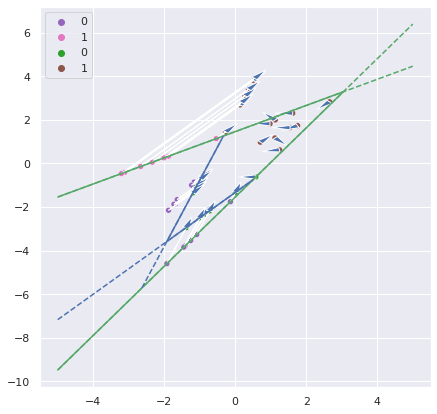

In [11]:
palette3 = {0:"tab:green",
           1:"tab:brown", 
           }
sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x1o,y1o, hue = y, palette = palette2)
sns.scatterplot(x2o,y2o, hue = y, palette = palette3)
# sns.scatterplot(x0,y0, hue = y, palette = palette)


# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')

plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')
# for i in range(len(original_set)):
#         plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
#                   head_width=0.2, head_length=0.5)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.2, head_length=0.5)

# Layer 3

In [12]:
print(W31)
weights31 = W31
s = 5
ss = np.linspace(-s,5, 2000)
# x31,y31 = Generate_Line([weights31[0][2],weights31[0][0],weights31[0][1]],ss)

x31,y31 = Generate_Line([weights31[2],weights31[0],weights31[1]],ss)

[ 0.3069356   0.36067791 -0.11704061]


In [13]:
line5 = makeList1(x31,y31)
t31,f31 = check_pos_previous(W1,line5)
t31,f31 = check_pos_previous(W21,t31)

x31s, y31s = seperatePoints(t31)
x31d, y31d = seperatePoints(f31)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


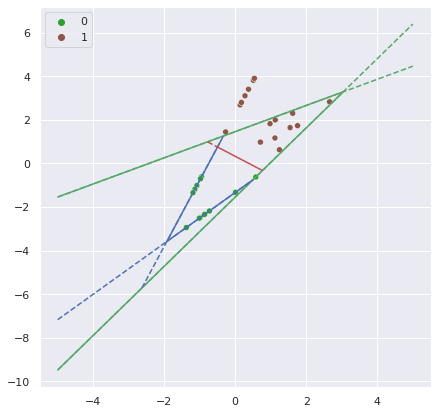

In [14]:
palette3 = {0:"tab:green",
           1:"tab:brown", 
           }
sns.set(rc = {'figure.figsize':(7,7)})
# sns.scatterplot(x1o,y1o, hue = y, palette = palette2)
sns.scatterplot(x2o,y2o, hue = y, palette = palette3)
# sns.scatterplot(x0,y0, hue = y, palette = palette)


# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')

plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')

# plt.plot(x31, y31, c ="r")
plt.plot(x31s, y31s, c ="r")
plt.plot(x31d, y31d, c ="r",linestyle = '--')

# for i in range(len(original_set)):
#         plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
#                   head_width=0.2, head_length=0.5)
# for i in range(len(original_set)):
#         plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
#                   head_width=0.2, head_length=0.5)

# Polyline + All Layers Transition

[[-1.02408269  0.6455378   0.9961947 ]
 [ 0.25714314 -0.42857189  0.62431197]
 [ 0.          0.          1.        ]]
[[-0.74466231 -0.66744141  1.6       ]
 [ 0.66744141 -0.74466231  0.8       ]
 [ 0.          0.          1.        ]]
[ 2  1 -2]
2500
[1. 0. 1.]
0


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

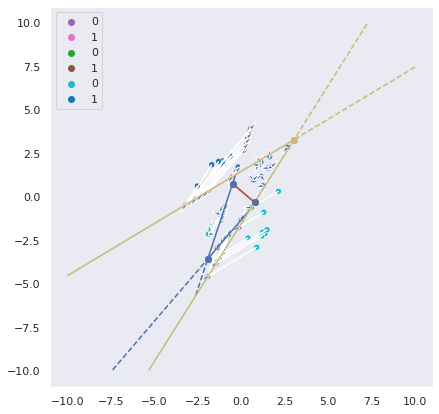

In [15]:
weights = [weights1, weights2, weights3]
bias = [bias1, bias2, bias3]

W = organize_input(weights, bias)

for w in W:
    print(w)
k = 50
n = 5000
I = [[-k, k], n]
sns.set(rc = {'figure.figsize':(7,7)})

fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')
# axs.set_facecolor('xkcd:white')

# fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
# plt_ind_list = np.arange(3)+131
# ax.set_aspect('equal')


draw_sectors(axs,matrix_list=W,   
                colors_list=['y', 'b', 'r'],   
                width_list=len(W)*[I],  
                height_list=len(W)*[I],  
                frame_shape=[[-10,10],[-10,10]],  
                remove_dotted_list=[False, False, True])

draw_polyline(axs, W, 0)

for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.2, head_length=0.5)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.2, head_length=0.5)
sns.scatterplot(x1o,y1o, hue = y, palette = palette2)
sns.scatterplot(x2o,y2o, hue = y, palette = palette3)
sns.scatterplot(x0,y0, hue = y, palette = palette)
plt.grid()
plt.show()

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

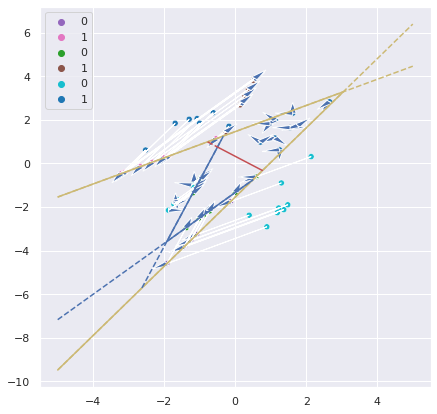

In [16]:
palette3 = {0:"tab:green",
           1:"tab:brown", 
           }
sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x1o,y1o, hue = y, palette = palette2)
sns.scatterplot(x2o,y2o, hue = y, palette = palette3)
sns.scatterplot(x0,y0, hue = y, palette = palette)


# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="y")
plt.plot(x11d, y11d, c ="y",linestyle = '--')
plt.plot(x12s, y12s, c ="y")
plt.plot(x12d, y12d, c ="y",linestyle = '--')

plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')

# plt.plot(x31, y31, c ="r")
plt.plot(x31s, y31s, c ="r")
plt.plot(x31d, y31d, c ="r",linestyle = '--')

for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.2, head_length=0.5)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.2, head_length=0.5)